## Imports

In [3]:
import os
import dlib
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import scipy
import pandas as pd
import random
import math

## Preprocessing:

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [4]:
def get_face_points_array(without_part, shape):
    if without_part is None:
        pts = np.array( # the 27 points on the face
            [[shape.part(0).x, shape.part(0).y], [shape.part(1).x, shape.part(1).y],
             [shape.part(2).x, shape.part(2).y], [shape.part(3).x, shape.part(3).y],
             [shape.part(4).x, shape.part(4).y], [shape.part(5).x, shape.part(5).y], 
             [shape.part(6).x, shape.part(6).y], [shape.part(7).x, shape.part(7).y],
             [shape.part(8).x, shape.part(8).y], [shape.part(9).x, shape.part(9).y],
             [shape.part(10).x, shape.part(10).y], [shape.part(11).x, shape.part(11).y], 
             [shape.part(12).x, shape.part(12).y], [shape.part(13).x, shape.part(13).y],
             [shape.part(14).x, shape.part(14).y], [shape.part(15).x, shape.part(15).y],
             [shape.part(16).x, shape.part(16).y], [shape.part(26).x, shape.part(26).y], 
             [shape.part(25).x, shape.part(25).y], [shape.part(24).x, shape.part(24).y],
             [shape.part(23).x, shape.part(23).y], [shape.part(22).x, shape.part(22).y],
             [shape.part(27).x, shape.part(27).y], [shape.part(21).x, shape.part(21).y], 
             [shape.part(20).x, shape.part(20).y], [shape.part(19).x, shape.part(19).y],
             [shape.part(18).x, shape.part(18).y], [shape.part(17).x, shape.part(17).y]], 
             dtype=np.int32)
    elif "eyebrows" == without_part:
        pts = np.array( # the 27 points on the face
            [[shape.part(0).x, shape.part(0).y], [shape.part(1).x, shape.part(1).y],
             [shape.part(2).x, shape.part(2).y], [shape.part(3).x, shape.part(3).y],
             [shape.part(4).x, shape.part(4).y], [shape.part(5).x, shape.part(5).y], 
             [shape.part(6).x, shape.part(6).y], [shape.part(7).x, shape.part(7).y],
             [shape.part(8).x, shape.part(8).y], [shape.part(9).x, shape.part(9).y],
             [shape.part(10).x, shape.part(10).y], [shape.part(11).x, shape.part(11).y], 
             [shape.part(12).x, shape.part(12).y], [shape.part(13).x, shape.part(13).y],
             [shape.part(14).x, shape.part(14).y], [shape.part(15).x, shape.part(15).y],
             [shape.part(16).x, shape.part(16).y], [shape.part(45).x, shape.part(45).y], 
             [shape.part(44).x, shape.part(44).y], [shape.part(43).x, shape.part(43).y],
             [shape.part(27).x, shape.part(27).y], [shape.part(38).x, shape.part(38).y],
             [shape.part(37).x, shape.part(37).y], [shape.part(36).x, shape.part(36).y]], 
             dtype=np.int32)
    elif "eyes" == without_part:
        pts = np.array( # the 27 points on the face
            [[shape.part(0).x, shape.part(0).y], [shape.part(1).x, shape.part(1).y],
             [shape.part(2).x, shape.part(2).y], [shape.part(3).x, shape.part(3).y],
             [shape.part(4).x, shape.part(4).y], [shape.part(5).x, shape.part(5).y], 
             [shape.part(6).x, shape.part(6).y], [shape.part(7).x, shape.part(7).y],
             [shape.part(8).x, shape.part(8).y], [shape.part(9).x, shape.part(9).y],
             [shape.part(10).x, shape.part(10).y], [shape.part(11).x, shape.part(11).y], 
             [shape.part(12).x, shape.part(12).y], [shape.part(13).x, shape.part(13).y],
             [shape.part(14).x, shape.part(14).y], [shape.part(15).x, shape.part(15).y],
             [shape.part(16).x, shape.part(16).y], [shape.part(26).x, shape.part(26).y], 
             [shape.part(25).x, shape.part(25).y], [shape.part(24).x, shape.part(24).y],
             [shape.part(23).x, shape.part(23).y], [shape.part(22).x, shape.part(22).y],
             [shape.part(42).x, shape.part(42).y], [shape.part(43).x, shape.part(43).y], 
             [shape.part(44).x, shape.part(44).y], [shape.part(45).x, shape.part(45).y], 
             [shape.part(46).x, shape.part(46).y], [shape.part(47).x, shape.part(47).y], 
             [shape.part(42).x, shape.part(42).y], [shape.part(22).x, shape.part(22).y], [shape.part(27).x, shape.part(27).y], 
             [shape.part(21).x, shape.part(21).y], [shape.part(39).x, shape.part(39).y], 
             [shape.part(40).x, shape.part(40).y], [shape.part(41).x, shape.part(41).y], 
             [shape.part(36).x, shape.part(36).y], [shape.part(37).x, shape.part(37).y], 
             [shape.part(38).x, shape.part(38).y], [shape.part(39).x, shape.part(39).y], 
             [shape.part(21).x, shape.part(21).y], [shape.part(20).x, shape.part(20).y], 
             [shape.part(19).x, shape.part(19).y],[shape.part(18).x, shape.part(18).y], 
             [shape.part(17).x, shape.part(17).y]], 
             dtype=np.int32)
    elif "nose" == without_part:
        pts = np.array( # the 27 points on the face
            [[shape.part(0).x, shape.part(0).y], [shape.part(1).x, shape.part(1).y],
             [shape.part(2).x, shape.part(2).y], [shape.part(3).x, shape.part(3).y],
             [shape.part(4).x, shape.part(4).y], [shape.part(5).x, shape.part(5).y], 
             [shape.part(6).x, shape.part(6).y], [shape.part(7).x, shape.part(7).y],
             [shape.part(8).x, shape.part(8).y], [shape.part(9).x, shape.part(9).y],
             [shape.part(10).x, shape.part(10).y], [shape.part(11).x, shape.part(11).y], 
             [shape.part(12).x, shape.part(12).y], [shape.part(13).x, shape.part(13).y],
             [shape.part(14).x, shape.part(14).y], [shape.part(15).x, shape.part(15).y],
             [shape.part(16).x, shape.part(16).y], [shape.part(26).x, shape.part(26).y], 
             [shape.part(25).x, shape.part(25).y], [shape.part(24).x, shape.part(24).y],
             [shape.part(23).x, shape.part(23).y], [shape.part(22).x, shape.part(22).y],
             [shape.part(27).x, shape.part(27).y], 
             
             [shape.part(28).x, shape.part(28).y], [shape.part(29).x, shape.part(29).y], 
             [shape.part(30).x, shape.part(30).y], [shape.part(35).x, shape.part(35).y], 
             [shape.part(34).x, shape.part(34).y], [shape.part(33).x, shape.part(33).y], 
             [shape.part(32).x, shape.part(32).y], [shape.part(31).x, shape.part(31).y], 
             [shape.part(30).x, shape.part(30).y], [shape.part(29).x, shape.part(29).y], 
             [shape.part(28).x, shape.part(28).y], [shape.part(27).x, shape.part(27).y], 
             
             [shape.part(21).x, shape.part(21).y], 
             [shape.part(20).x, shape.part(20).y], [shape.part(19).x, shape.part(19).y],
             [shape.part(18).x, shape.part(18).y], [shape.part(17).x, shape.part(17).y]], 
             dtype=np.int32)
    elif "mouth" == without_part:
        #print("HI")
        pts = np.array( # the 27 points on the face
            [[shape.part(0).x, shape.part(0).y], 
             
             [shape.part(48).x, shape.part(48).y], [shape.part(49).x, shape.part(49).y], 
             [shape.part(50).x, shape.part(50).y], [shape.part(51).x, shape.part(51).y],
             [shape.part(52).x, shape.part(52).y], [shape.part(53).x, shape.part(53).y],
             [shape.part(54).x, shape.part(54).y], [shape.part(55).x, shape.part(55).y],
             [shape.part(56).x, shape.part(56).y], [shape.part(57).x, shape.part(57).y],
             [shape.part(58).x, shape.part(58).y], [shape.part(59).x, shape.part(59).y],
             [shape.part(60).x, shape.part(60).y], [shape.part(48).x, shape.part(48).y], 
             [shape.part(0).x, shape.part(0).y],
             
             [shape.part(1).x, shape.part(1).y],
             [shape.part(2).x, shape.part(2).y], [shape.part(3).x, shape.part(3).y],
             [shape.part(4).x, shape.part(4).y], [shape.part(5).x, shape.part(5).y], 
             [shape.part(6).x, shape.part(6).y], [shape.part(7).x, shape.part(7).y],
             [shape.part(8).x, shape.part(8).y], [shape.part(9).x, shape.part(9).y],
             [shape.part(10).x, shape.part(10).y], [shape.part(11).x, shape.part(11).y], 
             [shape.part(12).x, shape.part(12).y], [shape.part(13).x, shape.part(13).y],
             [shape.part(14).x, shape.part(14).y], [shape.part(15).x, shape.part(15).y],
             [shape.part(16).x, shape.part(16).y], [shape.part(26).x, shape.part(26).y], 
             [shape.part(25).x, shape.part(25).y], [shape.part(24).x, shape.part(24).y],
             [shape.part(23).x, shape.part(23).y], [shape.part(22).x, shape.part(22).y],
             [shape.part(27).x, shape.part(27).y], [shape.part(21).x, shape.part(21).y], 
             [shape.part(20).x, shape.part(20).y], [shape.part(19).x, shape.part(19).y],
             [shape.part(18).x, shape.part(18).y], [shape.part(17).x, shape.part(17).y]], 
             dtype=np.int32)
    
    return pts

In [5]:
def load_cropped_image(folder_path, emotion_list, parts_list=None, read_type=""):
    print(parts_list)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
    # Initiate ORB detector
    orb = cv2.ORB_create()
    
    feature_list = []
    
    for emotion in emotion_list:
        emo_folder_path = folder_path + "/" + emotion
        #print("elp_0")
        for pic_file in glob.glob(os.path.join(emo_folder_path, "*png")):
            
            #print("Processing file: {}".format(pic_file))
            img = dlib.load_rgb_image(pic_file)
            #print(img)
            face_area = detector(img, 1)
            shape = predictor(img, face_area[0])

            pts = get_face_points_array(parts_list, shape)
            
            #Black White
            src = cv2.imread(pic_file, 0)
            
            # Create polygon shaped mask
            mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.int32)
            cv2.fillPoly(mask, np.int32([pts]), 1)
            mask = mask.astype(bool)
            # Fill in polygon with image
            out = np.zeros_like(src)
            out[mask] = src[mask]

            #src = cv2.imread(f, 0)
            cropped_image = out[int(face_area[0].top()):int(face_area[0].bottom()), int(face_area[0].left()):int(face_area[0].right())]
            cropped_image = cv2.resize(cropped_image, (130, 130))
            #print(cropped_image)

            feature_list.append(LBP_ORB_Vectors(cropped_image, orb, emotion))
    
    feature_list = processed_feature_list(feature_list)
        
    return feature_list 


# LBP & ORB
def LBP_ORB_Vectors(cropped_image, ORB_Object, emotion):
    # Read file
    src = cropped_image

    # Calculate local binary patterns
    lbp_image = local_binary_pattern(src, 8, 2, method='nri_uniform')
    # Find histogram of the uniform values
    histogram = np.unique(lbp_image, return_counts=True)
    #print(histogram)
    lbp_vector = [a for a in histogram[1]]

    # find the keypoints with ORB
    kp = ORB_Object.detect(src, None)
    # compute the descriptors with ORB
    kp, des = ORB_Object.compute(src, kp)

    # Return list
    #print(emotion)
    return [emotion, lbp_vector, des[0].tolist()] # Maybe it's not des[0]?

def processed_feature_list(full_list):
    #print("????????????????????????????????????????")
    overall_list = []
    for val in full_list: # val[1] = emotion, val[0] = number
        vector_LBP = val[1]
        vector_ORB = val[2]
        max_lbp = max(vector_LBP)
        vector_LBP = [int(a)/max_lbp for a in vector_LBP]

        max_orb = max(vector_ORB)
        vector_ORB = [a / max_orb for a in vector_ORB]
        #print(val[0])
        overall_list.append([val[0], vector_LBP+vector_ORB])

    c = 100
    for counter, (emo, vector) in enumerate(overall_list):
        print(vector)
        avg = sum(vector)/len(vector)
        r = 0
        for a in vector:
            r += (a-avg)**2
        print(f"R is {r}")
        new = []
        for counter1, a in enumerate(vector):
            print(a)
            new.append(100 * (a-avg)/(r+c))
        overall_list[counter][1] = new
    return overall_list
        
processed_feature_list([["angy", [1, 2], [3, 4]], ["angy", [5, 6], [7, 8]], ["angy", [9, 10], [11, 12]]])


[0.5, 1.0, 0.75, 1.0]
R is 0.171875
0.5
1.0
0.75
1.0
[0.8333333333333334, 1.0, 0.875, 1.0]
R is 0.02213541666666666
0.8333333333333334
1.0
0.875
1.0
[0.9, 1.0, 0.9166666666666666, 1.0]
R is 0.008541666666666666
0.9
1.0
0.9166666666666666
1.0


[['angy',
  [-0.3119638121977851,
   0.18717828731867103,
   -0.06239276243955701,
   0.18717828731867103]],
 ['angy',
  [-0.09372925263938972,
   0.0729005298306364,
   -0.052071807021883215,
   0.0729005298306364]],
 ['angy',
  [-0.0541620403257221,
   0.04582941873714959,
   -0.037496797148576864,
   0.04582941873714959]]]

In [ ]:
# Loading in CK+ Data
folder_path = "../CK+"
emotions_list = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

mouth = load_cropped_image(folder_path, emotions_list, "mouth")
nose = load_cropped_image(folder_path, emotions_list, "nose")
eyes = load_cropped_image(folder_path, emotions_list, "eyes")
eyebrows = load_cropped_image(folder_path, emotions_list, "eyebrows")

In [ ]:
mouth_df = pd.DataFrame(data=np.array(mouth, dtype=object), columns=['Emotion', 'Final_Vector'])
mouth_df.to_json("./mouth-CK+-vectors.json", orient='columns')

nose_df = pd.DataFrame(data=np.array(nose, dtype=object), columns=['Emotion', 'Final_Vector'])
nose_df.to_json("./nose-CK+-vectors.json", orient='columns')

eyes_df = pd.DataFrame(data=np.array(eyes, dtype=object), columns=['Emotion', 'Final_Vector'])
eyes_df.to_json("./eyes-CK+-vectors.json", orient='columns')

eyebrows_df = pd.DataFrame(data=np.array(eyebrows, dtype=object), columns=['Emotion', 'Final_Vector'])
eyebrows_df.to_json("./eyebrows-CK+-vectors.json", orient='columns')

In [63]:
full = load_cropped_image(folder_path, emotions_list)

None


KeyboardInterrupt: 

In [65]:
full_df = pd.DataFrame(data=np.array(full, dtype=object), columns=['Emotion', 'Final_Vector'])
full_df.to_json("./full-vectors.json", orient='columns')
full_df.head()

,Emotion,Final_Vector
0,anger,"[-1.9042751899696595, -2.179826000827677, -2.6..."
1,anger,"[-2.0135908645009044, -2.03560482046436, -2.17..."
2,anger,"[-1.7137834772002734, -2.2221979605904907, -2...."
3,anger,"[-2.1176072891331046, -2.212708937417162, -2.3..."
4,anger,"[-1.6534024632575004, -2.197767520627892, -2.5..."


In [75]:
def load_JAFFE(folder_path, parts_list=None):
    print(parts_list)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
    # Initiate ORB detector
    orb = cv2.ORB_create()
    
    feature_list = []
    
    emo_dict = {"AN":"anger", "DI":"disgust", "FE":"fear", "HA":"happiness", "NE":"neutral", "SA":"sad", "SU":"surprise"}
    for pic_file in glob.glob(os.path.join(folder_path, "*tiff")):
        emotion = emo_dict[pic_file[12:14]]
        #print(emotion)
        
        #Black White
        src = cv2.imread(pic_file, cv2.IMREAD_GRAYSCALE)
        
        #print("Processing file: {}".format(pic_file))
        #img = dlib.load_rgb_image(pic_file)
        #print(img)
        face_area = detector(src, 1)
        shape = predictor(src, face_area[0])
        #print(shape)
        
        pts = get_face_points_array(parts_list, shape)
        #print(src.shape[0], src.shape[1])
        
        # Create polygon shaped mask
        mask = np.zeros((src.shape[0], src.shape[1]), dtype=np.int32)
        cv2.fillPoly(mask, np.int32([pts]), 1)
        mask = mask.astype(bool)
        # Fill in polygon with image
        out = np.zeros_like(src)
        out[mask] = src[mask]
        
        #print(int(face_area[0].top()), int(face_area[0].bottom()), int(face_area[0].left()), int(face_area[0].right()))
        
        #src = cv2.imread(f, 0)
        cropped_image = out[int(face_area[0].top()):int(face_area[0].bottom()), int(face_area[0].left()):int(face_area[0].right())]
        cropped_image = cv2.resize(cropped_image, (130, 130))

        #print(cropped_image)
        
        feature_list.append(LBP_ORB_Vectors(cropped_image, orb, emotion))

    feature_list = processed_feature_list(feature_list)
        
    return feature_list 

eyes
anger
256 256
96 225 67 196


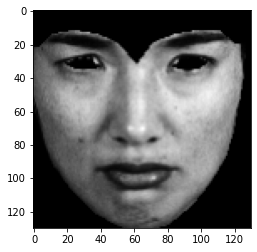

In [61]:
jaffe = load_JAFFE("../JAFFE/")

In [76]:
# Loading in JAFFE Data
folder_path = "../JAFFE/"
emotions_list = ["anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

mouth = load_JAFFE(folder_path, "mouth")
nose = load_JAFFE(folder_path, "nose")
eyes = load_JAFFE(folder_path, "eyes")
eyebrows = load_JAFFE(folder_path, "eyebrows")

mouth
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
nose
eyes
eyebrows


In [80]:
full = load_JAFFE(folder_path, None)
full_df = pd.DataFrame(data=np.array(full, dtype=object), columns=['Emotion', 'Final_Vector'])
full_df.to_json("./full-JAFFE-vectors.json", orient='columns')
full_df.head()

None


,Emotion,Final_Vector
0,anger,"[-1.4497217958046453, -2.1984204611070384, -2...."
1,neutral,"[-1.826033183451247, -2.2067438645092854, -2.2..."
2,anger,"[-1.5171411383113733, -2.3812456956510846, -2...."
3,sad,"[-1.7623400816861399, -2.1065124116983114, -2...."
4,anger,"[-1.3201887810513675, -2.1975859129141004, -2...."


In [79]:
mouth_df = pd.DataFrame(data=np.array(mouth, dtype=object), columns=['Emotion', 'Final_Vector'])
mouth_df.to_json("./mouth-JAFFE-vectors.json", orient='columns')

nose_df = pd.DataFrame(data=np.array(nose, dtype=object), columns=['Emotion', 'Final_Vector'])
nose_df.to_json("./nose-JAFFE-vectors.json", orient='columns')

eyes_df = pd.DataFrame(data=np.array(eyes, dtype=object), columns=['Emotion', 'Final_Vector'])
eyes_df.to_json("./eyes-JAFFE-vectors.json", orient='columns')

eyebrows_df = pd.DataFrame(data=np.array(eyebrows, dtype=object), columns=['Emotion', 'Final_Vector'])
eyebrows_df.to_json("./eyebrows-JAFFE-vectors.json", orient='columns')

In [20]:
mouth_df.head()
nose_df.head()
eyes_df.head()
eyebrows_df.head()

,Emotion,Final_Vector
0,anger,"[-2.0758431199688254, -2.3511814918999683, -2...."
1,anger,"[-1.99286986462701, -2.0114409663412984, -2.15..."
2,anger,"[-1.7387849705362906, -2.2221100464549814, -2...."
3,anger,"[-2.079812425732365, -2.1688737041573436, -2.3..."
4,anger,"[-1.674467729396145, -2.194264208640016, -2.52..."


In [40]:
#emo_dict_count = {'anger': 45, 'contempt': 18, 'disgust': 59, 'fear': 25, 'happiness': 69, 'neutral': 593,
# 'sadness': 28, 'surprise': 83}
mouth_df

,Emotion,Final_Vector
0,anger,"[-1.8590384680947911, -2.1290962458189155, -2...."
1,anger,"[-2.0090711487573825, -2.0100650330869123, -2...."
2,anger,"[-1.6958174053178625, -2.2207460136851713, -2...."
3,anger,"[-2.095034373830145, -2.219534298614781, -2.34..."
4,anger,"[-1.6229045134119429, -2.1342040275806773, -2...."
...,...,...
915,surprise,"[-1.6490508540442903, -2.087711189478617, -2.4..."
916,surprise,"[-1.5563852834315035, -2.0421636563327255, -2...."
917,surprise,"[-1.7835720976989011, -2.1015928684926317, -2...."
918,surprise,"[-2.1594413493308147, -2.3573831576926567, -2...."


In [ ]:
class Learn:
    def __init__(self, X, y):
        self.est = cv2.SVM()
        params = dict(kernel_type=cv2.SVM_RBF, svm_type=cv2.SVM_C_SVC)
        self.est.train_auto(X, y, None, None, params, 3) #kfold=3 (default: 10)

    def guess(self, X):
        return np.float32( [self.est.predict(s) for s in X])

#X = np.array(np.random.random((6,2)), dtype = np.float32)
#y = np.array([1.,0.,0.,1.,0.,1.], dtype = np.float32)
g = Learn(training_data,labels).guess(test_data)

In [4]:
def train_svm(train_percent, trials, list_of_vecs):
    emo_dict = {"anger": 0, "contempt": 1, "disgust": 2, "fear": 3, "happiness": 4, "neutral": 5, "sad": 6, "sadness": 6,
            "surprise": 7}
    # list_of_vecs = [[emotion, [vector]], [], []]
    
    #random.shuffle(shuffle_desk)
    #print(shuffle_desk[0])
    #print(len(shuffle_desk))
    train_count = int((len(list_of_vecs) * (train_percent/100))//1) # Round down
    print(train_count)
    accuracy = 0
    
    for trial_number in range(trials):
        train_set = random.sample(range(len(list_of_vecs)), train_count)
        train_labels, train_vectors = list(zip(*[list_of_vecs[a] for a in train_set]))
        
        train_vectors = np.matrix(train_vectors, dtype=np.float32)
        train_labels = np.array([emo_dict[a] for a in train_labels], dtype=int)

        test_set = [a for a in range(len(list_of_vecs)) if a not in train_set]
        test_labels, test_vectors = list(zip(*[list_of_vecs[a] for a in test_set]))
        
        test_vectors = np.matrix(test_vectors, dtype=np.float32)
        test_labels = np.array([emo_dict[a] for a in test_labels], dtype=int)
        
        
        # Train the SVM
        svm = cv2.ml.SVM_create()
        svm.trainAuto(samples = train_vectors, responses = train_labels, layout = cv2.ml.ROW_SAMPLE)
        
        # Test it
        print("For the train set:")
        confusion_matrix_count = np.zeros((8,8))
        right = 0
        wrong = 0
        #print(len(test_labels))
        #print(test_labels)
        #print(test_vectors)
        for label, vector in zip(train_labels, train_vectors):
            #print(svm.predict(vector))
            response = svm.predict(vector)[1]
            #print(label)
            confusion_matrix_count[int(response)][label] += 1
            if response == label:
                right += 1
            else:
                wrong += 1
        print(right/(right + wrong) * 100)
        print(confusion_matrix_count)
        
        
        print("###########################")
        
        
        # Confusion matrix: column headers = correct, rows = what was outputted
        confusion_matrix_count = np.zeros((8,8))
        right = 0
        wrong = 0
        
        print("For the test set:")
        for label, vector in zip(test_labels, test_vectors):
            #print(svm.predict(vector))
            response = svm.predict(vector)[1]
            #print(label)
            confusion_matrix_count[int(response)][label] += 1
            if response == label:
                right += 1
            else:
                wrong += 1
        acc = right/(right + wrong) * 100
        print(acc)
        print(confusion_matrix_count)
        
        if acc > accuracy:
            accuracy = acc
            # Store it by using OpenCV functions:
            svm.save("./model.dat")
        
        
        #####
        
                
        

In [5]:
def read_data(parts):
    JAFFE = pd.read_json(parts+'-JAFFE-vectors.json')
    CK = pd.read_json(parts+'-CK+-vectors.json')
    
    JAFFE_EMO = JAFFE['Emotion']
    JAFFE_VEC = JAFFE['Final_Vector']
    CK_EMO = CK['Emotion']
    CK_VEC = CK['Final_Vector']
    print(len(JAFFE_EMO))
    print(len(CK_EMO))
    return [[a, b] for (a,b) in zip(np.concatenate((JAFFE_EMO,CK_EMO)), np.concatenate((JAFFE_VEC,CK_VEC)))]

full = read_data("full")
#x, y = [a in full]
print(len(full))
a = []
b = []
for x, y in full:
    a.append(x)
    b.append(y)
print(full[0])

CK = pd.read_json('./full-CK+-vectors.json')
print(CK.head())
CKCK = [[a, b] for (a,b) in zip(CK['Emotion'], CK['Final_Vector'])]
print(CKCK[0])

#print(full)
train_svm(95, 1, CKCK) # mention struggles in discussion. -> use Autotrain

213
920
1133
['anger', [-1.4497217958, -2.1984204611, -2.3865854696, -2.283589886, -2.4103536812, -2.2954739918, -2.3984695754, -2.3073580976, -2.3964888911, -2.2479375686, -2.2578409901, -2.2994353604, -2.3608365737, -2.3509331522, -2.3053774133, -2.2855705703, -2.3053774133, -1.9032985004, -2.0161975055, -2.0795794031, -2.1568260908, -2.2063431983, -2.1588067751, -2.0736373502, -2.0954248775, -1.6240220142, -1.3724751081, -1.9746031352000002, -1.7884188111000001, -1.8973564475, -2.0696759816, -1.4497217958, -1.6913652804, -2.0676952973, -2.0558111915, -1.927066712, -2.1964397768, -1.9983713468, -2.2023818297, -2.1073089833, -2.2142659355, -2.3509331522, -2.3727206795, -2.2459568843, -2.2776478331, -2.2677444116, -2.3410297307, -2.3529138365, -2.3212228877, -2.382624101, -2.3925275225, -2.3548945208, -2.2360534628, -2.3509331522, -2.3865854696, -2.3747013638, -2.3093387819, 8.7607057694, 0.19424617300000002, -1.8801331058000001, 5.866753774, 5.4660527285, 8.3154823855, 4.0413379, 8.04

In [49]:
# PyCharm version ~ 90% accuracy
import cv2 as cv
import numpy as np
import pandas as pd


vectors3 = pd.read_json("./full-JAFFE-vectors.json")
vectors2 = pd.read_json("./full-CK+-vectors.json")

vectors= pd.concat((vectors3, vectors2), axis=0)
print(vectors.head())

label_emotions = []
data_vector_list = []
emo_dict = {"anger": 0, "contempt": 1, "disgust": 2, "fear": 3, "happiness": 4, "neutral": 5, "sadness": 6,"sad": 6,
            "surprise": 7}

length = len(vectors["Emotion"])
#shift = 5
confusion_matrix_count_total = np.zeros((8, 8))
counter = 0
for shift in range(0, 5):
    for a in range(length):
        # exclude 5% of each?
        # emo_dict_count = {'anger': 45, 'contempt': 18, 'disgust': 59, 'fear': 25, 'happiness': 69, 'neutral': 593,
        # 'sadness': 28, 'surprise': 83}
        # Maybe used F-1 score
        # Something which accounts for the imbalanced counts on each thing
        if a in list(range(-shift, length, 20)):
            continue
        emotion, vector = list(vectors.iloc[a])
        data_vector_list.append(vector)
        label_emotions.append(emo_dict[emotion])

    labels = np.array(label_emotions, dtype=int)
    trainingData = np.matrix(data_vector_list, dtype=np.float32)

    # Train the SVM
    svm = cv.ml.SVM_create()
    svm.setType(cv.ml.SVM_C_SVC)

    svm.setKernel(cv.ml.SVM_RBF)
    svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
    svm.train(trainingData, cv.ml.ROW_SAMPLE, labels) # C-> 86.9, 87.2, 89.3%

    #print('Before training')
    svm.train(trainingData, cv.ml.ROW_SAMPLE, labels)
    # https://docs.opencv.org/3.4/d1/d2d/classcv_1_1ml_1_1SVM.html
    #print('After training')
    confusion_matrix_count = np.zeros((8,8))
    ratio = {"Correct": 0, "Wrong": 0}
    

    
    for a in range(-shift, length, 20):
        counter +=1 
        #print("In for loop")
        real_a = a - (a+shift+1)//20
        predit = np.matrix(list(vectors.iloc[real_a])[1], dtype=np.float32) # Prediction array
        #print('between predit, predict')
        response = svm.predict(predit)[1]
        #print('After prediction')
        correct = label_emotions[real_a] # Correct value
        confusion_matrix_count[int(response)][correct] += 1
        confusion_matrix_count_total[int(response)][correct] += 1

        if int(response) == int(correct):
            ratio["Correct"] += 1
        else:
            ratio["Wrong"] += 1
            #print("Response was: " + str(response) + "; Response should have been " + str(correct))

    print(ratio["Correct"])
    print(ratio["Wrong"])
    print(ratio["Correct"]/(ratio["Correct"] + ratio["Wrong"]))
    confusion_matrix_count[7][0] += 1000
    print(confusion_matrix_count)

print(100 * (confusion_matrix_count_total[0][0] + confusion_matrix_count_total[1][1] +confusion_matrix_count_total[2][2] +
             confusion_matrix_count_total[3][3] +confusion_matrix_count_total[4][4] +confusion_matrix_count_total[5][5] +
             confusion_matrix_count_total[6][6] +confusion_matrix_count_total[7][7])/counter)
print(confusion_matrix_count_total)
    # Explainable ML

    # Remove parts of faces, see which changes the prediction/confusion matrix the most
    # (response, correct) = (row (counting top-> bot), column(left->right))
    #
    # [ 3.  0.  0.  0.  0.  0.  0.  0.]
    #  [ 0.  1.  0.  0.  0.  0.  0.  0.]
    #  [ 0.  0.  3.  0.  0.  0.  0.  0.]
    #  [ 0.  0.  0.  1.  0.  0.  0.  0.]
    #  [ 0.  0.  0.  0.  3.  1.  0.  0.]
    #  [ 0.  0.  0.  0.  0. 29.  1.  1.]
    #  [ 0.  0.  0.  0.  0.  0.  0.  2.]
    #  [ 0.  0.  0.  0.  0.  0.  0.  2.]]

    # (44+15+55+18+61+581+57)/938 = 88.6%
    # [[ 44.   3.   0.   0.   0.   0.   0.   0.]
    #  [  0.  15.   4.   0.   0.   0.   0.   0.]
    #  [  0.   0.  55.   7.   0.   0.   0.   0.]
    #  [  0.   0.   0.  18.   8.   0.   0.   0.]
    #  [  0.   0.   0.   0.  61.  12.   0.   0.]
    #  [  1.   0.   0.   0.   0. 581.  28.  15.]
    #  [  0.   0.   0.   0.   0.   0.   0.  30.]
    #  [  0.   0.   0.   0.   0.   0.   0.  57.]]

    # Confusion matrix: 8x8 with the emotions -> mixups = input neutral/sad -> ends up neutral, sad, surprised

    # Mediapipe library - finding keypoints
    # use SVM on those, see how adjusting keypoints would change the classification



   Emotion                                       Final_Vector
0    anger  [-1.4497217958, -2.1984204611, -2.3865854696, ...
1  neutral  [-1.8260331834999999, -2.2067438645, -2.268975...
2    anger  [-1.5171411383, -2.3812456957, -2.5635177507, ...
3      sad  [-1.7623400817000001, -2.1065124117, -2.164682...
4    anger  [-1.3201887811, -2.1975859129, -2.3720391438, ...
13
44
0.22807017543859648
[[   1.    1.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.]
 [   0.    0.    2.    2.    1.    0.    0.    0.]
 [   0.    0.    0.    1.    1.    0.    0.    0.]
 [   1.    0.    0.    1.    2.    1.    0.    1.]
 [   0.    0.    1.    0.    0.    6.    1.    1.]
 [   1.    0.    0.    0.    0.    0.    0.    3.]
 [1000.    0.    0.    0.    1.   25.    0.    1.]]
16
41
0.2807017543859649
[[1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00

In [127]:
CK+ Full
90.32608695652173
[[ 44.   3.   0.   0.   0.   0.   0.   0.]
 [  0.  15.   4.   0.   0.   0.   0.   0.]
 [  0.   0.  55.   7.   0.   0.   0.   0.]
 [  0.   0.   0.  18.   8.   0.   0.   0.]
 [  0.   0.   0.   0.  61.  12.   0.   0.]
 [  1.   0.   0.   0.   0. 581.  28.  15.]
 [  0.   0.   0.   0.   0.   0.   0.  30.]
 [  0.   0.   0.   0.   0.   0.   0.  57.]]

SyntaxError: invalid syntax (3591834321.py, line 3)

In [128]:
CK+ without mouth
91.0869565217
[[ 20.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  10.   4.   0.   0.   0.]
 [  0.   0.   0.   0.  31.   5.   0.   0.]
 [  1.   0.   0.   0.   0. 290.  16.   5.]
 [  0.   0.   0.   0.   0.   0.   0.  19.]
 [  0.   0.   0.   0.   0.   0.   0.  28.]]

SyntaxError: invalid syntax (1613745438.py, line 1)

In [129]:
CK+ without nose
91.0869565217
[[ 20.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  10.   4.   0.   0.   0.]
 [  0.   0.   0.   0.  31.   5.   0.   0.]
 [  1.   0.   0.   0.   0. 290.  16.   5.]
 [  0.   0.   0.   0.   0.   0.   0.  19.]
 [  0.   0.   0.   0.   0.   0.   0.  28.]]

SyntaxError: invalid syntax (2371625598.py, line 1)

In [130]:
Without eyes
91.0869565217
[[ 20.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  10.   4.   0.   0.   0.]
 [  0.   0.   0.   0.  31.   5.   0.   0.]
 [  1.   0.   0.   0.   0. 290.  16.   5.]
 [  0.   0.   0.   0.   0.   0.   0.  19.]
 [  0.   0.   0.   0.   0.   0.   0.  28.]]


SyntaxError: invalid syntax (889871105.py, line 1)

In [131]:
Without eyebrows
91.0869565217
[[ 20.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  10.   4.   0.   0.   0.]
 [  0.   0.   0.   0.  31.   5.   0.   0.]
 [  1.   0.   0.   0.   0. 290.  16.   5.]
 [  0.   0.   0.   0.   0.   0.   0.  19.]
 [  0.   0.   0.   0.   0.   0.   0.  28.]]

SyntaxError: invalid syntax (4217370420.py, line 1)

In [132]:
Moving a black box around

SyntaxError: invalid syntax (152627875.py, line 1)

In [ ]:
Yale database

In [150]:
# Repeat until every emotion is in test_labels
        if 0 not in test_labels or 1 not in test_labels or 2 not in test_labels or 3 not in test_labels or 4 not in test_labels or 5 not in test_labels or 6 not in test_labels or 7 not in test_labels:
            print("hi")
            while 0 not in test_labels or 1 not in test_labels or 2 not in test_labels or 3 not in test_labels or 4 not in test_labels or 5 not in test_labels or 6 not in test_labels or 7 not in test_labels:
                train_set = random.sample(range(len(list_of_vecs)), train_count)
                train_labels, train_vectors = list(zip(*[shuffle_desk[a] for a in train_set]))

                train_vectors = np.matrix(train_vectors, dtype=np.float32)
                train_labels = np.array([emo_dict[a] for a in train_labels], dtype=int)


                test_set = [a for a in range(len(list_of_vecs)) if a not in train_set]
                test_labels, test_vectors = list(zip(*[shuffle_desk[a] for a in test_set]))

                test_vectors = np.matrix(test_vectors, dtype=np.float32)
                test_labels = np.array([emo_dict[a] for a in test_labels], dtype=int)
                #print(len(train_set))
                #print(len(test_set))

IndentationError: unexpected indent (325233183.py, line 2)